In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv("youtube_ad_revenue_dataset.csv")

In [3]:
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [4]:
df.shape

(122400, 12)

In [5]:
df.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [7]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [8]:
df.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

In [9]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


## EDA (Exploratory Data Analysis): Identify trends, correlations, and outliers.

### 1 . identify tends (date, views,country and ad revenue)

In [10]:
# check date columns

df['date'].head()

0    2024-09-24 10:50:40.993199
1    2024-09-22 10:50:40.993199
2    2024-11-21 10:50:40.993199
3    2025-01-28 10:50:40.993199
4    2025-04-28 10:50:40.993199
Name: date, dtype: object

In [11]:
# 1.1 Date conversion & Feature derivation

df['Date'] = pd.to_datetime(df.get('date', df.get('Date')), errors='coerce')  # Convert date column to datetime format

df['Year'] = df['Date'].dt.year       # Extract year from date

df['Quarter'] = 'Q' + df['Date'].dt.quarter.astype(str)     # Extract quarter from date

df['Date'] = df['Date'].dt.date  # Time-a removed 

#  Verify
df[['Date', 'Year', 'Quarter']].head()

,Date,Year,Quarter
0,2024-09-24,2024,Q3
1,2024-09-22,2024,Q3
2,2024-11-21,2024,Q4
3,2025-01-28,2025,Q1
4,2025-04-28,2025,Q2


In [12]:
# 1.2 Time-based Trends (Views & Revenue)

# Group data by date and calculate total views and ad revenue
trend_df = df.groupby('Date')[['views', 'ad_revenue_usd']].sum().reset_index()

trend_df.head() 
                 # Trend identified: Shows how views and ad revenue change over time.

,Date,views,ad_revenue_usd
0,2024-06-09,3421393,88141.320937
1,2024-06-10,3239667,81761.292555
2,2024-06-11,3430322,86056.557260
3,2024-06-12,3369757,85603.309713
4,2024-06-13,3238268,82246.827354


In [13]:
# 1.3  Category Trend

# Group data by category and calculate average views and ad revenue
category_trend = df.groupby('category')[['views', 'ad_revenue_usd']].mean().reset_index()

category_trend
                     # Trend identified: Which content category performs better on average.
                     # High revenue vs low revenue categories

,category,views,ad_revenue_usd
0,Education,9999.902311,252.481643
1,Entertainment,10000.192249,252.445854
2,Gaming,9999.939044,253.507619
3,Lifestyle,9999.697628,251.860649
4,Music,10000.380122,252.587527
5,Tech,9999.024359,253.473340


In [14]:
# 1.4 Device- Trend

# Group data by device type and calculate total views
device_trend = df.groupby('device')['views'].sum().reset_index()

device_trend
           # which device has the highest views.

,device,views
0,Desktop,305790454
1,Mobile,305984674
2,TV,306437687
3,Tablet,305769594


In [15]:
# 1.5 Country  Revenue Trends

# Group data by country and calculate total ad revenue
country_trend = (df.groupby('country')['ad_revenue_usd'].sum().reset_index().sort_values('ad_revenue_usd', ascending=False))

country_trend
             # Which country generates the highest revenue

,country,ad_revenue_usd
1,CA,5.208801e+06
2,DE,5.202010e+06
3,IN,5.194430e+06
0,AU,5.129839e+06
4,UK,5.116952e+06
5,US,5.081779e+06


## 2 . Correlation

### Correlation  ( Heatmap )


In [16]:
df.corr(numeric_only=True)

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,Year
views,1.000000,0.016101,0.019563,0.027236,0.001074,0.000774,0.038497,-0.007032
likes,0.016101,1.000000,-0.002063,0.003110,0.001250,0.003563,0.146449,-0.004478
comments,0.019563,-0.002063,1.000000,-0.001006,-0.002665,-0.001556,0.034274,-0.004141
watch_time_minutes,0.027236,0.003110,-0.001006,1.000000,-0.000952,0.005513,0.988874,0.002085
video_length_minutes,0.001074,0.001250,-0.002665,-0.000952,1.000000,0.002578,-0.000446,-0.006142
subscribers,0.000774,0.003563,-0.001556,0.005513,0.002578,1.000000,0.005907,-0.003472
ad_revenue_usd,0.038497,0.146449,0.034274,0.988874,-0.000446,0.005907,1.000000,0.001119
Year,-0.007032,-0.004478,-0.004141,0.002085,-0.006142,-0.003472,0.001119,1.000000


In [17]:
# Numeric columns only
df_numeric = df.select_dtypes(include='number')

# Correlation matrix
corr = df_numeric.corr()


print(corr['ad_revenue_usd'].sort_values(ascending=False))

ad_revenue_usd          1.000000
watch_time_minutes      0.988874
likes                   0.146449
views                   0.038497
comments                0.034274
subscribers             0.005907
Year                    0.001119
video_length_minutes   -0.000446
Name: ad_revenue_usd, dtype: float64


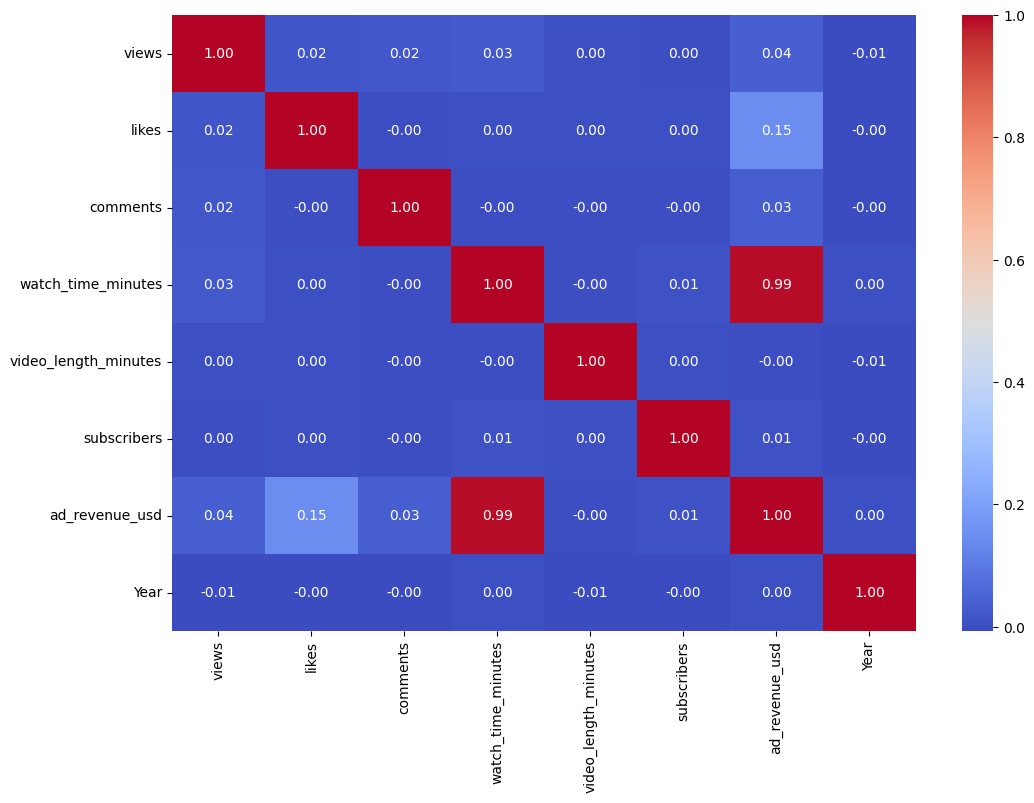

In [18]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

##  3 . Outliers :  (Statistical Detection , Visual  Detection)


### 3 . 1 Statistical  Detection
using Method IQR and Z-Score.

In [19]:
#  IQR Method
Q1 = df['ad_revenue_usd'].quantile(0.25)
Q3 = df['ad_revenue_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df['ad_revenue_usd'] < lower_bound) | (df['ad_revenue_usd'] > upper_bound)]
print(f"IQR Method: Found {len(iqr_outliers)} outliers")

#  Z-Score Method
z_scores = np.abs(stats.zscore(df['ad_revenue_usd'].fillna(0)))
z_outliers = df[z_scores > 3]
print(f"Z-Score Method (|Z| > 3): Found {len(z_outliers)} outliers")

IQR Method: Found 0 outliers
Z-Score Method (|Z| > 3): Found 0 outliers


## 3 . 2  Visual Outlier Detection
Using plots to identify extreme data points.

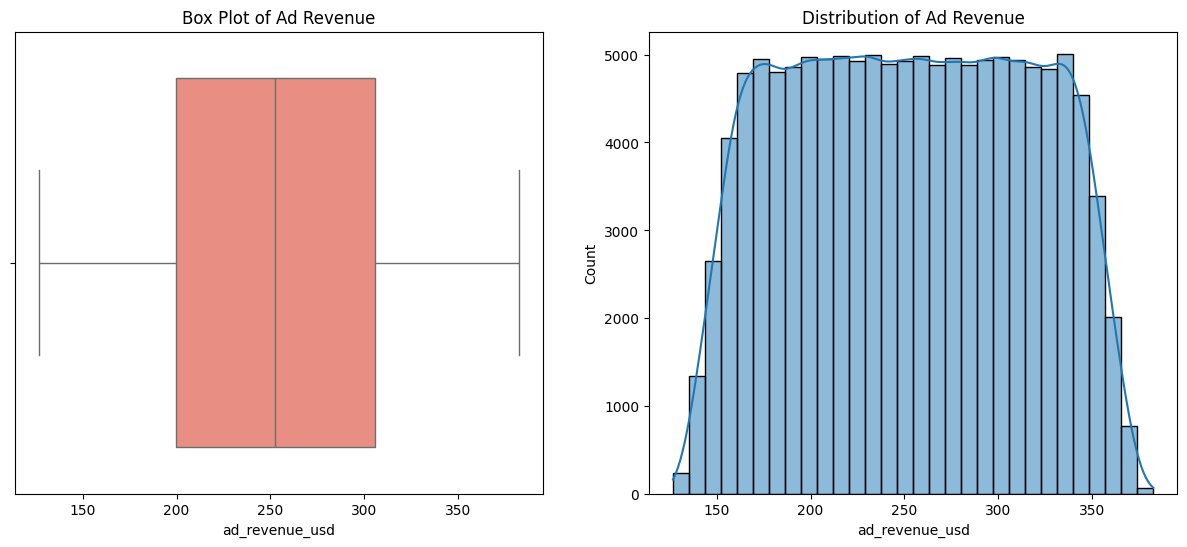

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot
sns.boxplot(x=df['ad_revenue_usd'], ax=axes[0], color='salmon')
axes[0].set_title('Box Plot of Ad Revenue')

# Histogram Plot
sns.histplot(df['ad_revenue_usd'], bins=30, kde=True)
plt.title('Distribution of Ad Revenue')
plt.show()

## Preprocessing: Handle missing values, remove duplicates, and encode categorical variables.

### 1. Remove duplicates

In [21]:
# check duplicates

df.duplicated().sum()

np.int64(2400)

In [22]:
  # Remove Duplicates

before = len(df)
df.drop_duplicates(inplace=True)
print("Duplicates Removed:", before - len(df))

Duplicates Removed: 2400


### 2. Handle missing values

In [23]:
#  Handle missing values 

# likes & comments → 0
df[['likes', 'comments']] = df[['likes', 'comments']].fillna(0)

# watch_time_minutes → median
df['watch_time_minutes'] = df['watch_time_minutes'].fillna(df['watch_time_minutes'].median())

In [24]:
df.isnull().sum()

video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
Date                    0
Year                    0
Quarter                 0
dtype: int64

### 3, Encode categorical variables.

In [25]:
# One-Hot Encode categorical columns and get numeric output
df = pd.get_dummies(df,columns=['category', 'device', 'country'],drop_first=True,dtype=int)

In [26]:
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,Date,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,2024-09-24,...,0,0,0,1,0,0,0,1,0,0
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,2024-09-22,...,0,0,0,0,1,1,0,0,0,0
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,2024-11-21,...,0,0,0,1,0,1,0,0,0,0
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,2025-01-28,...,0,0,1,0,0,0,0,0,1,0
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,2025-04-28,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,280.986396,2024-12-14,...,0,0,0,0,1,0,0,0,0,1
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,354.612981,2024-07-13,...,1,0,0,0,0,0,0,0,1,0
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,0.0,27549.714659,23.822365,576756,203.643106,2024-06-10,...,0,1,0,0,1,1,0,0,0,0
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,351.525811,2024-12-22,...,1,0,1,0,0,0,0,0,1,0


In [27]:
# remove date columns 
  
df.drop(columns=['date'], inplace=True)

In [28]:
df

,video_id,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,Date,Year,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,vid_3092,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,2024-09-24,2024,...,0,0,0,1,0,0,0,1,0,0
1,vid_3459,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,2024-09-22,2024,...,0,0,0,0,1,1,0,0,0,0
2,vid_4784,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,2024-11-21,2024,...,0,0,0,1,0,1,0,0,0,0
3,vid_4078,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,2025-01-28,2025,...,0,0,1,0,0,0,0,0,1,0
4,vid_3522,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,2025-04-28,2025,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,9853,1673.0,147.0,42075.704885,25.490195,210818,280.986396,2024-12-14,2024,...,0,0,0,0,1,0,0,0,0,1
122396,vid_3890,10128,1709.0,63.0,57563.703040,16.229133,878860,354.612981,2024-07-13,2024,...,1,0,0,0,0,0,0,0,1,0
122397,vid_3934,10267,700.0,0.0,27549.714659,23.822365,576756,203.643106,2024-06-10,2024,...,0,1,0,0,1,1,0,0,0,0
122398,vid_4260,10240,1616.0,106.0,56967.384382,7.753099,585138,351.525811,2024-12-22,2024,...,1,0,1,0,0,0,0,0,1,0


### Feature Engineering: Create new features ( engagement rate = (likes + comments) / views).

In [29]:
# Create Engagement Rate feature
if all(col in df.columns for col in ['likes', 'comments', 'views']):
    df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

    # Handle division by zero
    df['engagement_rate'] = df['engagement_rate'].fillna(0)

    # Optional: round for readability
    df['engagement_rate'] = df['engagement_rate'].round(4)


### check : columns

In [30]:
df[['engagement_rate']].head()

,engagement_rate
0,0.1551
1,0.0986
2,0.2145
3,0.1428
4,0.2361


### Check : View the first few rows

In [31]:
df[['likes', 'comments', 'views', 'engagement_rate']].head()

,likes,comments,views,engagement_rate
0,1221.0,320.0,9936,0.1551
1,642.0,346.0,10017,0.0986
2,1979.0,187.0,10097,0.2145
3,1191.0,242.0,10034,0.1428
4,1858.0,477.0,9889,0.2361


### Check : View last few rows

In [32]:
df[['likes', 'comments', 'views', 'engagement_rate']].tail()

,likes,comments,views,engagement_rate
122395,1673.0,147.0,9853,0.1847
122396,1709.0,63.0,10128,0.1750
122397,700.0,0.0,10267,0.0682
122398,1616.0,106.0,10240,0.1682
122399,770.0,0.0,9931,0.0775


In [33]:
df

,video_id,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,Date,Year,...,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US,engagement_rate
0,vid_3092,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,2024-09-24,2024,...,0,0,1,0,0,0,1,0,0,0.1551
1,vid_3459,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,2024-09-22,2024,...,0,0,0,1,1,0,0,0,0,0.0986
2,vid_4784,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,2024-11-21,2024,...,0,0,1,0,1,0,0,0,0,0.2145
3,vid_4078,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,2025-01-28,2025,...,0,1,0,0,0,0,0,1,0,0.1428
4,vid_3522,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,2025-04-28,2025,...,0,1,0,0,1,0,0,0,0,0.2361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,9853,1673.0,147.0,42075.704885,25.490195,210818,280.986396,2024-12-14,2024,...,0,0,0,1,0,0,0,0,1,0.1847
122396,vid_3890,10128,1709.0,63.0,57563.703040,16.229133,878860,354.612981,2024-07-13,2024,...,0,0,0,0,0,0,0,1,0,0.1750
122397,vid_3934,10267,700.0,0.0,27549.714659,23.822365,576756,203.643106,2024-06-10,2024,...,1,0,0,1,1,0,0,0,0,0.0682
122398,vid_4260,10240,1616.0,106.0,56967.384382,7.753099,585138,351.525811,2024-12-22,2024,...,0,1,0,0,0,0,0,1,0,0.1682


##  Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

#  Target & Features separate
y = df['ad_revenue_usd']

X = df.drop('ad_revenue_usd', axis=1)

# Numeric columns 
X = X.select_dtypes(include='number')

#  Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Output check 
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,Year,category_Entertainment,category_Gaming,category_Lifestyle,...,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US,engagement_rate
0,-0.638847,0.314868,0.424406,-0.872319,-1.627204,-0.950903,-0.877982,2.234392,-0.446865,-0.444326,...,-0.447589,-0.577209,1.728747,-0.576593,-0.449867,-0.449359,2.225660,-0.445777,-0.442940,0.426122
1,0.171818,-0.718662,0.610274,-1.763982,0.954887,0.810515,-0.877982,-0.447549,2.237814,-0.444326,...,-0.447589,-0.577209,-0.578454,1.734325,2.222877,-0.449359,-0.449305,-0.445777,-0.442940,-0.553751
2,0.972474,1.667918,-0.526381,1.563550,1.259475,-0.907735,-0.877982,-0.447549,-0.446865,-0.444326,...,-0.447589,-0.577209,1.728747,-0.576593,2.222877,-0.449359,-0.449305,-0.445777,-0.442940,1.456290
3,0.341957,0.261317,-0.133198,-0.490193,-0.525371,-0.235154,1.138976,2.234392,-0.446865,-0.444326,...,-0.447589,1.732474,-0.578454,-0.576593,-0.449867,-0.449359,-0.449305,2.243273,-0.442940,0.212805
4,-1.109233,1.451930,1.546762,-1.727966,-1.160443,-1.596116,1.138976,-0.447549,-0.446865,-0.444326,...,-0.447589,1.732474,-0.578454,-0.576593,2.222877,-0.449359,-0.449305,-0.445777,-0.442940,1.830896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,-1.469529,1.121700,-0.812331,0.358315,1.171603,-1.010786,-0.877982,-0.447549,-0.446865,-0.444326,...,-0.447589,-0.577209,-0.578454,1.734325,-0.449867,-0.449359,-0.449305,-0.445777,2.257641,0.939472
119996,1.282729,1.185961,-1.412828,1.581802,0.026126,1.305878,-0.877982,-0.447549,-0.446865,-0.444326,...,-0.447589,-0.577209,-0.578454,-0.576593,-0.449867,-0.449359,-0.449305,2.243273,-0.442940,0.771246
119997,2.673870,-0.615130,-1.863200,-0.789176,0.965313,0.258229,-0.877982,-0.447549,-0.446865,-0.444326,...,2.234192,-0.577209,-0.578454,1.734325,2.222877,-0.449359,-0.449305,-0.445777,-0.442940,-1.080975
119998,2.403648,1.019953,-1.105431,1.534695,-1.022254,0.287297,-0.877982,-0.447549,-0.446865,-0.444326,...,-0.447589,1.732474,-0.578454,-0.576593,-0.449867,-0.449359,-0.449305,2.243273,-0.442940,0.653314


## Model Building: Experiment with 5 different regression models to predict ad_revenue_usd, and compare their performance to identify the most effective model.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Select numeric features and removing the target variable (ad_revenue_usd)

X = df.select_dtypes(include=['number']).drop('ad_revenue_usd', axis=1)
                                                 
y = df['ad_revenue_usd']  # Target variable

# 80% training data, 20% testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                     

#  Models to compare

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)}

# Model training , Predict , Evaluate

for name, model in models.items():

    model.fit(X_train, y_train) # Model training  
    
    preds = model.predict(X_test) # Predict the data

    r2 = r2_score(y_test, preds) # R²

    rmse = np.sqrt(mean_squared_error(y_test, preds)) # Root Mean Squared Error (RMSE)

    mae = mean_absolute_error(y_test, preds) # Mean Absolute Error (MAE)

       #  Evaluate

    print(f"{name} → R2: {r2:.3f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Linear → R2: 0.949, RMSE: 14.02, MAE: 4.79
Ridge → R2: 0.949, RMSE: 14.02, MAE: 4.79
Lasso → R2: 0.949, RMSE: 14.02, MAE: 4.79
RandomForest → R2: 0.949, RMSE: 13.91, MAE: 3.55
GradientBoosting → R2: 0.952, RMSE: 13.53, MAE: 3.69


## Model Evaluation 

In [36]:
#  Prepare features (X) and target (y)


# Select numeric features and removing the target variable (ad_revenue_usd)

X = df.select_dtypes(include=['number']).drop(columns=['ad_revenue_usd'], errors='ignore')
                                                                          #  remove it if it exists (to avoid errors)
                                                                          
y = df['ad_revenue_usd'] #  # Target variable



# # Split the data into 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Models to compare

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)}



results = []          # Store all model evaluation metrics


# Model training , Predict ,  results comparison ,  Evaluate

for name, model in models.items():

    model.fit(X_train, y_train) # Model training

    preds = model.predict(X_test)  # Predict the data
    
    r2 = r2_score(y_test, preds)  # R²

    rmse = np.sqrt(mean_squared_error(y_test, preds))  # Root Mean Squared Error (RMSE)

    mae = mean_absolute_error(y_test, preds)   # Mean Absolute Error (MAE)


    mape = np.mean(np.abs((y_test - preds) / y_test)) * 100 # # MAPE :  percentage error


    
    # Store results for comparison
    
    results.append({"Model": name, "R2": r2, "RMSE": rmse, "MAE": mae, "MAPE%": mape})


       #  Evaluate

    print(f"{name:16} | R2: {r2:.3f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

Linear           | R2: 0.949 | RMSE: 14.02 | MAE: 4.79 | MAPE: 2.06%
Ridge            | R2: 0.949 | RMSE: 14.02 | MAE: 4.79 | MAPE: 2.06%
Lasso            | R2: 0.949 | RMSE: 14.02 | MAE: 4.79 | MAPE: 2.06%
RandomForest     | R2: 0.949 | RMSE: 13.91 | MAE: 3.55 | MAPE: 1.52%
GradientBoosting | R2: 0.952 | RMSE: 13.53 | MAE: 3.69 | MAPE: 1.59%


In [37]:
# Create comparison table

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
results_df

,Model,R2,RMSE,MAE,MAPE%
4,GradientBoosting,0.952208,13.531952,3.685120,1.587754
3,RandomForest,0.949467,13.914586,3.547770,1.521493
2,Lasso,0.948728,14.015968,4.785475,2.055786
0,Linear,0.948717,14.017490,4.787781,2.056647
1,Ridge,0.948716,14.017657,4.788131,2.056795


# Check : Final Model

In [38]:
results_df = pd.DataFrame(results)

best_model_name = results_df.sort_values(by=['R2', 'RMSE'],ascending=[False, True]).iloc[0]['Model']

best_model = models[best_model_name]

print("Best Model:", best_model_name)


Best Model: GradientBoosting


#  Pickle

In [41]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("model saved successfully ")


model saved successfully 
